In [7]:
import numpy as np
from PIL import Image

In [23]:
#conda install -c anaconda pillow
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [9]:
 im = Image.open('pic.tiff')

In [12]:
imarray = np.array(im)

In [14]:
imarray.shape

(512, 512)

In [15]:
np.max(imarray)

3774

In [16]:
index = np.where(imarray==np.max(imarray))

In [17]:
index


(array([318]), array([111]))

In [18]:
imcut = imarray[308:328,101:121]

In [20]:
imcut.shape

(20, 20)

In [21]:
def fit(x,y,x0, y0,sigma):
    g = (1/(2*np.pi*sigma**2))*np.exp(-((x-x0)**2+(y-y0)**2)/(2*sigma**2))
    return g

In [25]:
x, y = np.meshgrid(np.linspace(0,20,20),np.linspace(0,20,20))

In [26]:
z = imcut

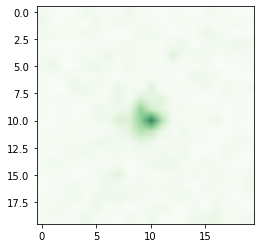

In [28]:
plt.imshow(z, cmap ="Greens", alpha = 0.7, 
           interpolation ='bilinear')

In [29]:
y = np.ones(20)

In [61]:
x = np.linspace(0,20,20)

In [132]:
z = imcut[10,:]
z = z/np.max(z)

In [133]:
z.shape

(20,)

In [134]:
def func(x,a,b,x0):
    return a*np.exp(-b*(x-x0)**2)

In [135]:
popt, _ = curve_fit(func, x,z)

In [136]:
popt

array([ 0.74587587,  0.14588237, 10.15765459])

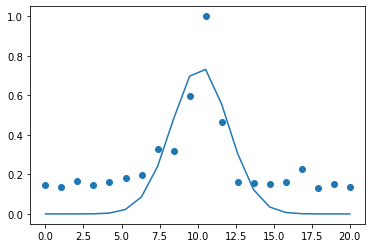

In [137]:
#print(x.shape)
plt.scatter(x,z)
plt.plot(x,func(x, *popt))